In [1]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading dataset

In [2]:
data=pd.read_csv("dhaka homeprices.csv")

In [4]:
df=data.copy()

In [5]:
df.head()

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000


In [6]:
df.shape

(10, 2)

In [7]:
df.isnull().any()

area     False
price    False
dtype: bool

In [8]:
df.isnull().sum()

area     0
price    0
dtype: int64

## Display the visulization

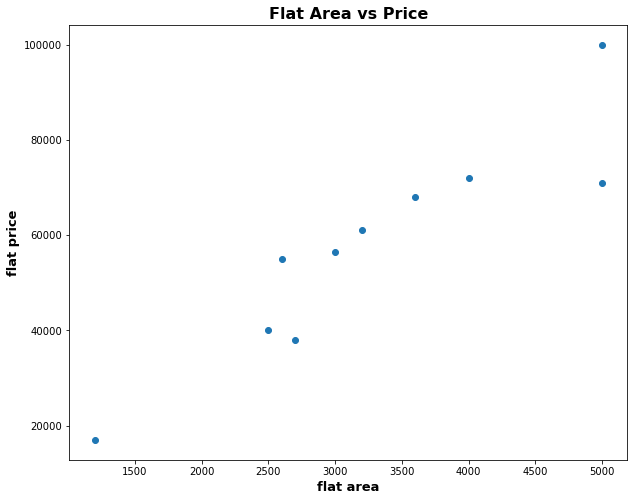

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(df['area'],df['price'])
plt.xlabel("flat area",fontsize=13,fontweight='bold')
plt.ylabel("flat price",fontsize=13,fontweight='bold')
plt.title("Flat Area vs Price",fontsize=16,fontweight='bold')
plt.show()

## Separate dependent and independent variable

In [10]:
x=df[['area']] # 2D value
y=df['price'] #1D value

In [13]:
x.shape

(10, 1)

In [14]:
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,5000
6,2500
7,2700
8,1200
9,5000


In [15]:
y

0     55000
1     56500
2     61000
3     68000
4     72000
5     71000
6     40000
7     38000
8     17000
9    100000
Name: price, dtype: int64

## Spliting the Dataset for regression model

In [16]:
#loading sklearn model for regression
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
xtrain

,area
4,4000
0,2600
3,3600
1,3000
7,2700
8,1200
5,5000


In [19]:
xtest

,area
2,3200
9,5000
6,2500


## Fitting data with multiple linear regression model

In [20]:
from sklearn.linear_model import LinearRegression # loading linear regression model
reg=LinearRegression()
reg.fit(xtrain,ytrain)
reg.predict(xtest)

array([54577.95521897, 81852.07441554, 43971.35330919])

In [21]:
reg.predict([[2600]])

array([45486.58215344])

## Check the accuracy of the model

In [22]:
reg.coef_

array([15.15228844])

In [23]:
reg.intercept_

6090.63220283173

## Linear Equation
Y=mx+c where m is coefficient, c is intercept, x is independent and Y is dependent variable

In [24]:
y=15.15228844*2600+6090.63220283173

In [25]:
y #this is result similar with the output of model

45486.58214683173

## Drawing the best fit line

In [30]:
out=reg.predict(xtrain)

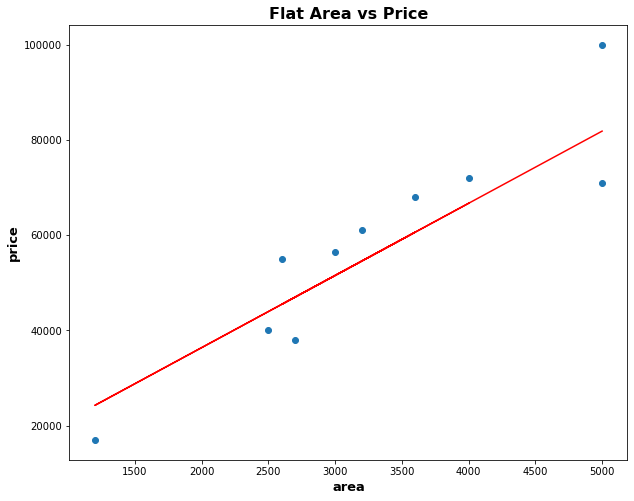

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(df['area'],df['price'])
plt.plot(xtrain,out,color='red')
plt.xlabel("area",fontsize=13,fontweight='bold')
plt.ylabel("price",fontsize=13,fontweight='bold')
plt.title("Flat Area vs Price",fontsize=16,fontweight='bold')

plt.show()

In [32]:
reg.score(xtest,ytest)

0.7916065214158411

## R square value calculated

In [33]:
from sklearn.metrics import r2_score

In [34]:
prediction=reg.predict(xtest)
result_r2=r2_score(ytest,prediction)

In [35]:
result_r2

0.7916065214158411

In [ ]:
import tensorflow